# Fitting Parameters for Influenza Data

## Overview

This is a study of the Influenza data. The analysis provides plots of fits and parameter estimates. Two models are considered.

### Influenza Data (Influenza.csv)

- 6 patients
- Viral levels in log10(TCID50 / ml of nasal wash)
- Measurements taken a successive days since volunteer exposure
- Columns are patients

### State variables

- $T$: number of target cells
- $E$: number of exposed cells (virus replicating inside, not yet spreading virus)
- $I$: number of infected cells (active virus production)
- $V$: viral titre, in units of TCID50/ml of biofluid wash (for Influenza)

### Baseline Model: $T \rightarrow E \rightarrow I \rightarrow \emptyset$
 $\frac{dT}{dt} = - \beta T V$
 
 $\frac{dE}{dt} =  \beta T V - \kappa E$
 
 $\frac{dI}{dt} = \kappa E - \delta I$
 
 $\frac{dV}{dt} = p y(I) - c y(V)$
 
### Simplified Model: $T \rightarrow I \rightarrow \emptyset$
 $\frac{dT}{dt} = - \beta T V$
 
 $\frac{dI}{dt} = \beta T V - \delta I$
 
 $\frac{dV}{dt} = p y(I) - c y(V)$
 

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import SBstoat
from SBstoat.modelStudy import ModelStudy
%matplotlib inline

In [2]:
# Programming Constants Used in Analysis
USE_SERIALIZED = False  # Use saved values of fitting from a previous bootstrap (if present)
DO_SERIALIZE = True  # Update the saved values of fitted data
DIR = "/home/ubuntu/SBstoat/examples/virus"  # Directory where the data are
FILE_NAME = "Influenza.csv"  # Name of the file containing the observed data
NUM_BOOTSTRAP_ITERATION = 10000  # Number of bootstrap iterations, if bootstrapping is done
VIRUS = "V"  # Name of the state variable that corresponds to the observed data

## Study for Baseline Model

In [3]:
ANTIMONY_MODEL  = '''
    // Equations
    E1: T -> E ; beta*T*V ; // Target cells to exposed
    E2: E -> I ; kappa*E ;  // Exposed cells to infected
    E3: -> V ; p*I ;        // Virus production by infected cells
    E4: V -> ; c*V ;        // Virus clearance
    E5: I -> ; delta*I      // Death of infected cells    

    // Parameters - from the Influenza article,
        
    beta = 3.2e-5;  // rate of transition of target(T) to exposed(E) cells, in units of 1/[V] * 1/day
    kappa = 4.0;    // rate of transition from exposed(E) to infected(I) cells, in units of 1/day
    delta = 5.2;    // rate of death of infected cells(I), in units of 1/day
    p = 4.6e-2;     // rate virus(V) producion by infected cells(I), in units of [V]/day
    c = 5.2;        // rate of virus clearance, in units of 1/day

    // Initial conditions
    T = 4E+8 // estimate of the total number of susceptible epithelial cells
             // in upper respiratory tract)
    E = 0
    I = 0
    V = 0.75 // the dose of virus in TCID50 in Influenza experiment; could be V=0 and I = 20 instead for a natural infection

'''

### 1. Data Setup
Create separate timeseries for each patient.

In [4]:
# Transform the input data into separate data sources.
path = os.path.join(DIR, FILE_NAME)
patients = ["P%d" % (p+1) for p in range(6)]
dataSourceDct = SBstoat.modelStudy.mkDataSourceDct(path, VIRUS,
                                                   dataSourceNames=patients)

In [5]:
# dataSourceDct is a python dictionary. The key is 'Pn', where n is the patient number.
# The value is a time series for that patient.
dataSourceDct

{'P1':         V
 time     
 0.0   2.0
 1.0   5.5
 2.0   4.0
 3.0   5.5
 4.0   3.0
 5.0   0.0
 6.0   0.0,
 'P2':         V
 time     
 0.0   1.0
 1.0   6.0
 2.0   3.0
 3.0   1.5
 4.0   3.5
 5.0   1.3
 6.0   0.0,
 'P3':         V
 time     
 0.0   2.5
 1.0   5.0
 2.0   5.0
 3.0   3.0
 4.0   5.5
 5.0   3.5
 6.0   0.0,
 'P4':         V
 time     
 0.0   3.5
 1.0   5.5
 2.0   6.5
 3.0   5.5
 4.0   3.5
 5.0   4.0
 6.0   0.0,
 'P5':         V
 time     
 0.0   2.5
 1.0   3.0
 2.0   6.5
 3.0   6.5
 4.0   2.0
 5.0   0.8
 6.0   0.0,
 'P6':         V
 time     
 0.0   4.0
 1.0   5.0
 2.0   5.5
 3.0   7.5
 4.0   5.5
 5.0   1.3
 6.0   0.0}

### 2. Transform the simulation results to units of observed values
The observed values are in units of log10. So, simulation results must
be converted to these units. This is done by specifying a data transformation.
The data transformation is a function. It accepts as input the timeseries produced by the simulation;
the output is a numpy array.

In [6]:
def transformDataArr(timeseries):
    """
    Changes the timeseries to log units
    """
    arr = np.array([1 if v < 1 else v
          for v in timeseries[VIRUS]])
    return np.log10(arr)

### 3. Specify permissible values for parameters
For each parameter, provide a tuple of its: lower bound, upper bound, and starting value.

In [7]:
# Parameter value ranges: lower, upper, initial value
parameterDct = dict(
      beta=(0, 10e-5, 3.2e-5),
      kappa=(0, 10, 4.0),
      delta=(0, 10, 5.2),
      p=(0, 1, 4.6e-2),
      c=(0, 10, 5.2)
      )

### 4. Run the model and produce plots.



Doing bootstrapp for instance P1

**Running bootstrap for 10000 iterations with 4 processes.
bootstrap completed 1000 iterations.
bootstrap completed 2000 iterations.
bootstrap completed 3000 iterations.
bootstrap completed 4000 iterations.
bootstrap completed 5000 iterations.
bootstrap completed 6000 iterations.
bootstrap completed 7000 iterations.
bootstrap completed 8000 iterations.
bootstrap completed 9000 iterations.
Completed bootstrap process 3.
bootstrap completed 10000 iterations.
Completed bootstrap process 1.
Completed bootstrap process 2.
Completed bootstrap process 4.
*10000 bootstrap estimates of parameters.


Doing bootstrapp for instance P2

**Running bootstrap for 10000 iterations with 4 processes.
Completed bootstrap process 2.
Completed bootstrap process 3.
Completed bootstrap process 4.
Completed bootstrap process 1.
*16 bootstrap estimates of parameters.


Doing bootstrapp for instance P3

**Running bootstrap for 10000 iterations with 4 processes.
Completed boots

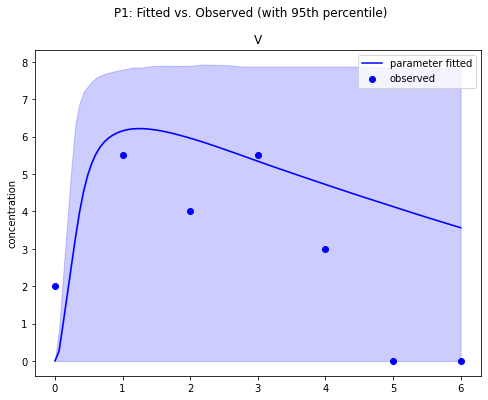

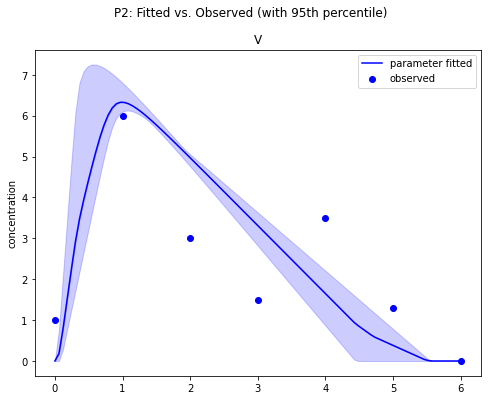

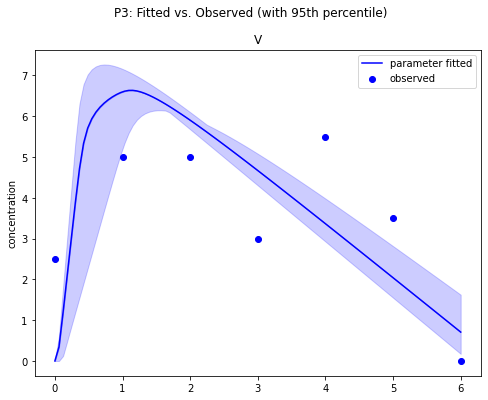

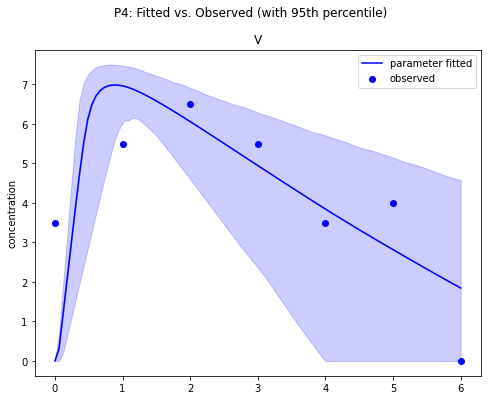

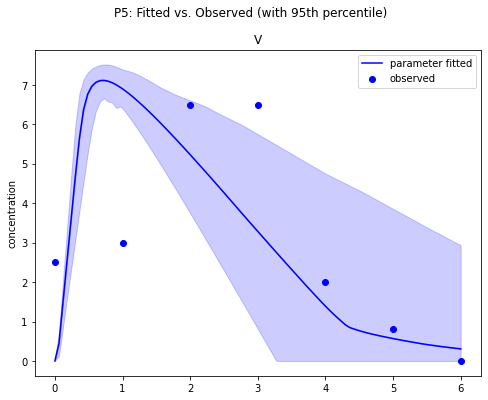

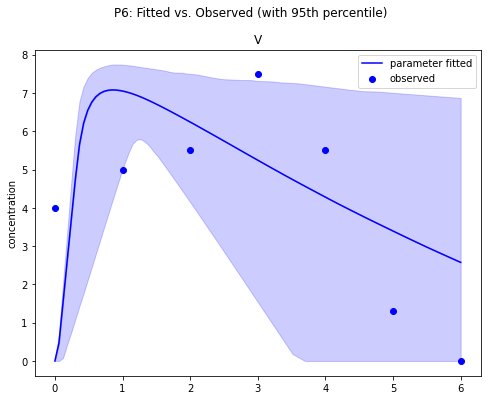

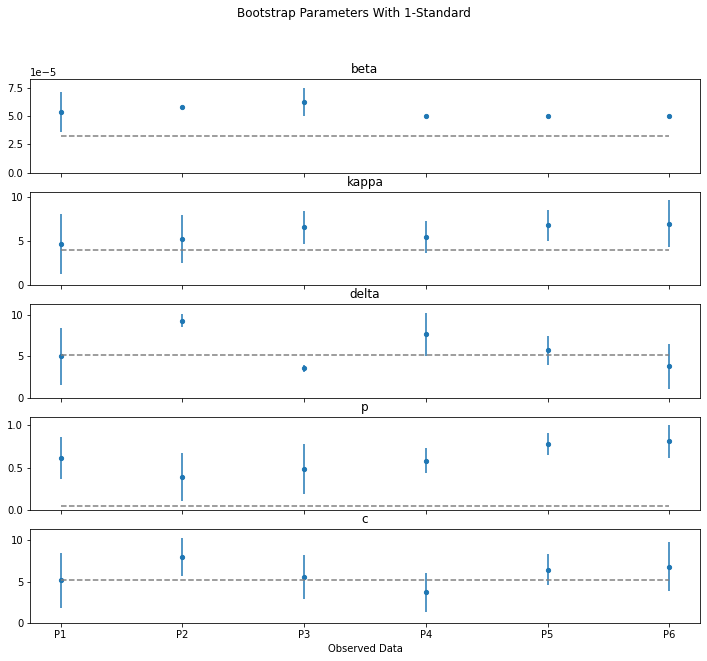

In [8]:
dirStudyPath = os.path.join(DIR, "ModelStudyFitters")

# Study of model fitting
study = ModelStudy(ANTIMONY_MODEL, dataSourceDct,
                  parameterDct=parameterDct,
                  dirStudyPath=dirStudyPath,
                  fittedDataTransformDct={"V": transformDataArr},
                  doSerialize=DO_SERIALIZE, useSerialized=USE_SERIALIZED)

study.bootstrap(numIteration=NUM_BOOTSTRAP_ITERATION)
study.plotFitAll()
study.plotParameterEstimates()


## SIR Model: $T \rightarrow I \rightarrow \emptyset$

Step 1 - step 3 are the same as before.

In [9]:
SIR_MODEL  = '''
    // Equations
    E1: T -> I ; beta*T*V ; // Target cells to exposed
    E3: -> V ; p*I ;        // Virus production by infected cells
    E4: V -> ; c*V ;        // Virus clearance
    E5: I -> ; delta*I      // Death of infected cells    

    // Parameters - from the Influenza article,
        
    beta = 3.2e-5;  // rate of transition of target(T) to exposed(E) cells, in units of 1/[V] * 1/day
    kappa = 4.0;    // rate of transition from exposed(E) to infected(I) cells, in units of 1/day
    delta = 5.2;    // rate of death of infected cells(I), in units of 1/day
    p = 4.6e-2;     // rate virus(V) producion by infected cells(I), in units of [V]/day
    c = 5.2;        // rate of virus clearance, in units of 1/day

    // Initial conditions
    T = 4E+8 // estimate of the total number of susceptible epithelial cells
             // in upper respiratory tract)
    I = 0
    V = 0.75 // the dose of virus in TCID50 in Influenza experiment; could be V=0 and I = 20 instead for a natural infection

'''

### Step 4: Run the model and produce plots



Doing bootstrapp for instance P1

**Running bootstrap for 10000 iterations with 4 processes.
bootstrap completed 1000 iterations.
bootstrap completed 2000 iterations.
bootstrap completed 3000 iterations.
bootstrap completed 4000 iterations.
bootstrap completed 5000 iterations.
bootstrap completed 6000 iterations.
bootstrap completed 7000 iterations.
bootstrap completed 8000 iterations.
bootstrap completed 9000 iterations.
Completed bootstrap process 2.
Completed bootstrap process 4.
bootstrap completed 10000 iterations.
Completed bootstrap process 1.
Completed bootstrap process 3.
*10000 bootstrap estimates of parameters.


Doing bootstrapp for instance P2

**Running bootstrap for 10000 iterations with 4 processes.
Completed bootstrap process 2.
Completed bootstrap process 4.
Completed bootstrap process 1.
Completed bootstrap process 3.
*140 bootstrap estimates of parameters.


Doing bootstrapp for instance P3

**Running bootstrap for 10000 iterations with 4 processes.
bootstrap comp

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning:

invalid value encountered in true_divide

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning:

invalid value encountered in double_scalars



Completed bootstrap process 2.


/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning:

invalid value encountered in true_divide

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning:

invalid value encountered in double_scalars



Completed bootstrap process 1.


/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning:

invalid value encountered in true_divide

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning:

invalid value encountered in double_scalars



Completed bootstrap process 4.


/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning:

invalid value encountered in true_divide

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning:

invalid value encountered in double_scalars



*0 bootstrap estimates of parameters.


Doing bootstrapp for instance P6

**Running bootstrap for 10000 iterations with 4 processes.


/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning:

Mean of empty slice.

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning:

Degrees of freedom <= 0 for slice

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning:

invalid value encountered in true_divide

/home/ubuntu/SBstoat/sbs/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning:

invalid value encountered in double_scalars

/home/ubuntu/SBstoat/SBstoat/timeseriesStatistic.py:136: RuntimeWarning:

invalid value encountered in true_divide



bootstrap completed 1000 iterations.
bootstrap completed 2000 iterations.
bootstrap completed 3000 iterations.
bootstrap completed 4000 iterations.
bootstrap completed 5000 iterations.
bootstrap completed 6000 iterations.
bootstrap completed 7000 iterations.
bootstrap completed 8000 iterations.
bootstrap completed 9000 iterations.
bootstrap completed 10000 iterations.
Completed bootstrap process 1.
Completed bootstrap process 2.
Completed bootstrap process 3.
Completed bootstrap process 4.
*10000 bootstrap estimates of parameters.


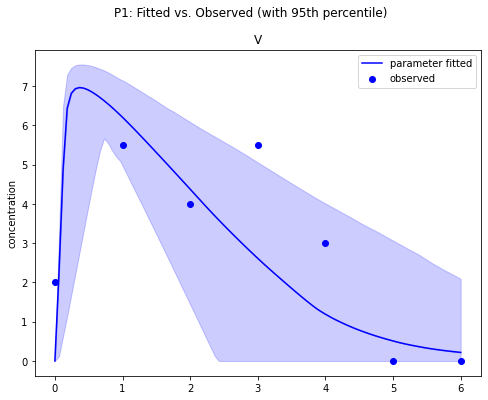

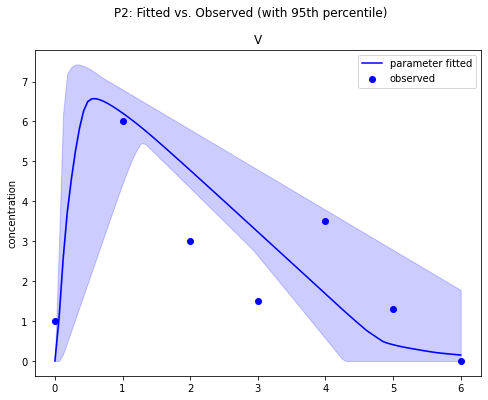

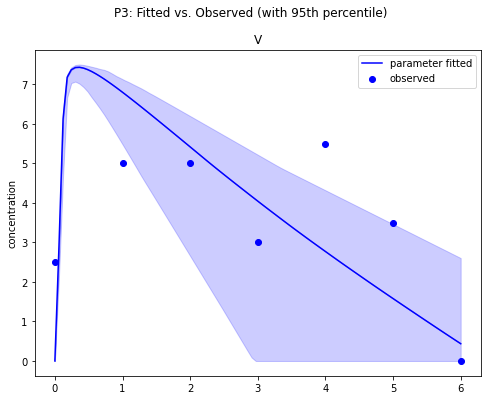

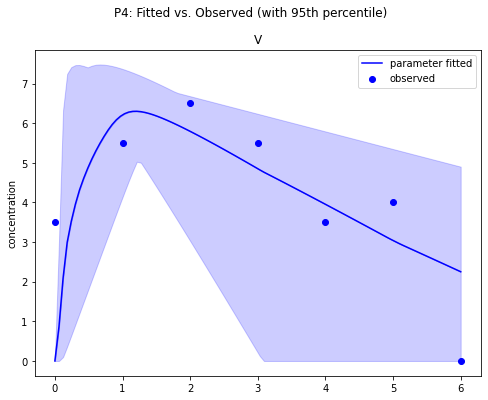

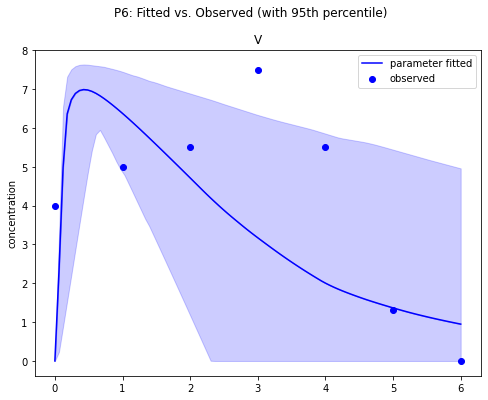

AttributeError: 'NoneType' object has no attribute 'parameterDct'

In [10]:
dirStudyPath = os.path.join(DIR, "SIRModelFitters")

# Study of model fitting
study = ModelStudy(SIR_MODEL, dataSourceDct,
                  parameterDct=parameterDct,
                  dirStudyPath=dirStudyPath,
                  fittedDataTransformDct={"V": transformDataArr},
                  doSerialize=DO_SERIALIZE, useSerialized=USE_SERIALIZED)

study.bootstrap(numIteration=NUM_BOOTSTRAP_ITERATION)
study.plotFitAll()
study.plotParameterEstimates()